In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

____

Notebook con ejercicios para clasificar atletas por el tipo de medalla que ganarán

# 1. Data

In [4]:
train = pd.read_csv('olympics_train.csv')
test = pd.read_csv('olympics_test.csv')
train.shape, test.shape

((216892, 15), (54224, 14))

# 2. EDA y conversión de variables

#### 2.1 Distribución del target

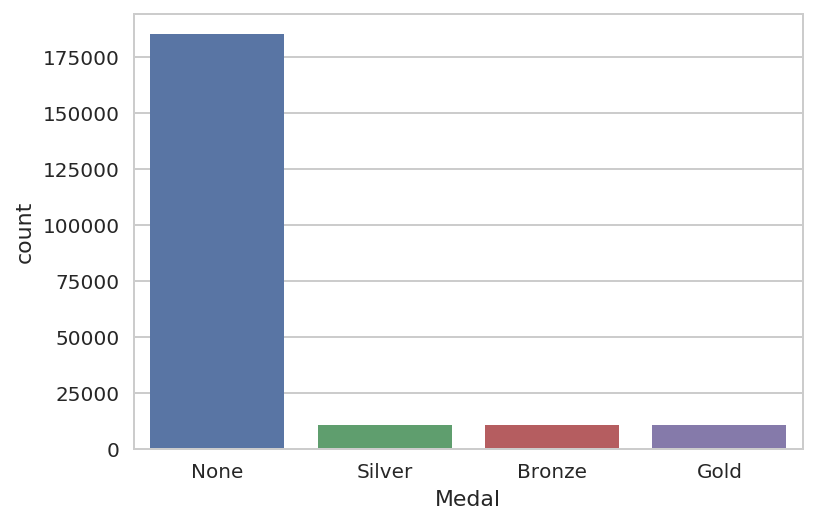

In [5]:
sns.countplot(train.Medal)

#### 2.2 Identificar Variables categóricas y numéricas

In [6]:
train.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**NOC:** National Olympic Committee

In [7]:
train.describe().T

count          mean           std     min       25%      50%  \
ID      216892.0  68256.592571  39071.861202     1.0  34585.75  68219.0   
Age     209286.0     25.563287      6.390543    11.0     21.00     24.0   
Height  168821.0    175.347528     10.514119   127.0    168.00    175.0   
Weight  166636.0     70.708212     14.341882    25.0     60.00     70.0   
Year    216892.0   1978.391780     29.852793  1896.0   1960.00   1988.0   

              75%       max  
ID      102155.25  135571.0  
Age         28.00      97.0  
Height     183.00     226.0  
Weight      79.00     214.0  
Year      2002.00    2016.0

**Variables numéricas:** ..  
**Variables categóricas:** ..

#### 2.3 Eliminar variables innecesarias

In [8]:
train.sample()

ID           Name Sex   Age  Height  Weight         Team  NOC  \
150059  83109  Manuela Mller   F  25.0   163.0    58.0  Switzerland  SUI   

              Games  Year  Season    City             Sport  \
150059  2006 Winter  2006  Winter  Torino  Freestyle Skiing   

                                   Event Medal  
150059  Freestyle Skiing Women's Aerials  None

In [9]:
# TO DO ..

#### 2.4 Rellenar valores faltantes(?)

In [10]:
train.isnull().sum()

Sex           0
Age        7606
Height    48071
Weight    50256
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [12]:
# TO DO ..

#### 2.5 Transformación de variables categóricas(?)

**Verificar la cardinalidad de variables categóricas**

In [13]:
train.sample()

Sex   Age  Height  Weight   Team  NOC  Year  Season     City  \
89769   F  21.0   160.0    60.0  Japan  JPN  1972  Winter  Sapporo   

                      Sport  \
89769  Cross Country Skiing   

                                                   Event Medal  
89769  Cross Country Skiing Women's 3 x 5 kilometres ...  None

**Variables categóricas: ** ID, Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal

In [14]:
cat_cols = # TO DO ..

In [ ]:
# TO DO ..
# La columna NOC tiene 229 valores diferentes
# La columna Season tiene 2 valores diferentes

In [17]:
from sklearn import preprocessing

In [18]:
# TO DO ..

# 3. Machine Learning

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# TO DO ..

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediciones sobre el train

In [21]:
from sklearn.metrics import f1_score

In [22]:
y_pred = dt.predict(X)
f1_score(y, y_pred, average='weighted')

0.9988290425317677

Predicciones sobre el test

In [24]:
y_pred_test = dt.predict(test)
f1_score(y_test, y_pred_test, average='weighted')

0.8546774567498951

In [25]:
df_ytest = pd.DataFrame({'Medal': y_pred_test})
df_ytest.to_csv('olympics_submission.csv', index=False)